#packages-----------------------------------------------------------------------------------------------------------------

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# for model training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# import model for regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ipmort LGBM
from lightgbm import LGBMClassifier

# import catboost 
from catboost import CatBoostClassifier

# import tensorflow for creating neural networks
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# for model evaluation
from sklearn.metrics import accuracy_score, classification_report

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# function for Sub-Heading
def heading(title):
    print('-'*80)
    print(title.upper())
    print('-'*80)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#load dataset
df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\Student Study Performances\\study_performance.csv')

#Statistical Summary-----------------------------------------------------------------------------------------------------

In [ ]:
#data overview
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#check for duplicates
df.duplicated(subset = 'gender').sum()

998

In [ ]:
#check for categorical collumn have appropriate levels
df_cat = df[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]
df_cat.nunique()

gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64

In [ ]:
#check categorical value
for i in df_cat.columns:
    print(i.upper(),":",df_cat[i].unique())

GENDER : ['female' 'male']
RACE_ETHNICITY : ['group B' 'group C' 'group A' 'group D' 'group E']
PARENTAL_LEVEL_OF_EDUCATION : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
LUNCH : ['standard' 'free/reduced']
TEST_PREPARATION_COURSE : ['none' 'completed']


In [ ]:
# Displaying the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Displaying the statistical summary of the DataFrame
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Shape of the Dataset

In [ ]:
# No of rows and columns
sh = df.shape
print(f'There are {sh[0]} rows and {sh[1]} columns in the dataset.')

There are 1000 rows and 8 columns in the dataset.


In [ ]:
#Missing values
# Calculate the percentage of missing values in each column
a = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

# Iterate over each column and its corresponding missing value percentage
for col, percentage in a.items():

    # Print the column name and its missing value percentage with 2 decimal places
    # '<30' in the f-string format specifies left alignment with a field width of 30 characters for the column names.
    print(f'{col:<30} {percentage:.2f}%')

gender                         0.00%
race_ethnicity                 0.00%
parental_level_of_education    0.00%
lunch                          0.00%
test_preparation_course        0.00%
math_score                     0.00%
reading_score                  0.00%
writing_score                  0.00%


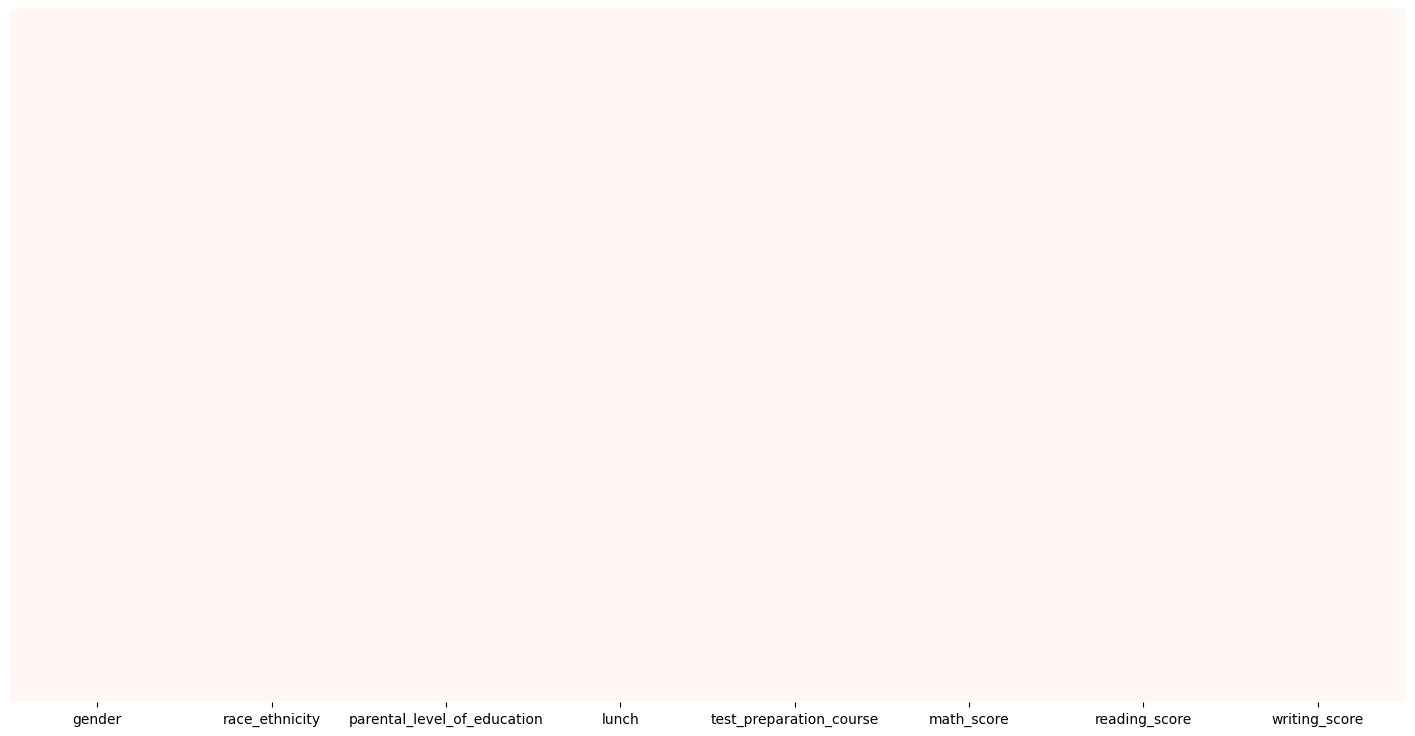

In [ ]:
#Heatmap for missing values
# Visualize the missing values
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='RdPu')
plt.show()

In [ ]:
#No of Catagorical and Numerical Columns:

# Initialize counters for categorical and numerical columns
objectt = 0
integers = 0

# Iterate over each column in the DataFrame
for i in df.columns:
    # Check if the column dtype is 'object', indicating a categorical column
    if df[i].dtype == 'object':
        # Increment the categorical column counter
        objectt += 1
    # Check if the column dtype is 'int64', indicating a numerical column
    elif df[i].dtype == 'int64':
        # Increment the numerical column counter
        integers += 1

# Print the total count of categorical and numerical columns in the dataset
print(f'There are {objectt} categorical and {integers} numerical columns in the dataset')

There are 5 categorical and 3 numerical columns in the dataset


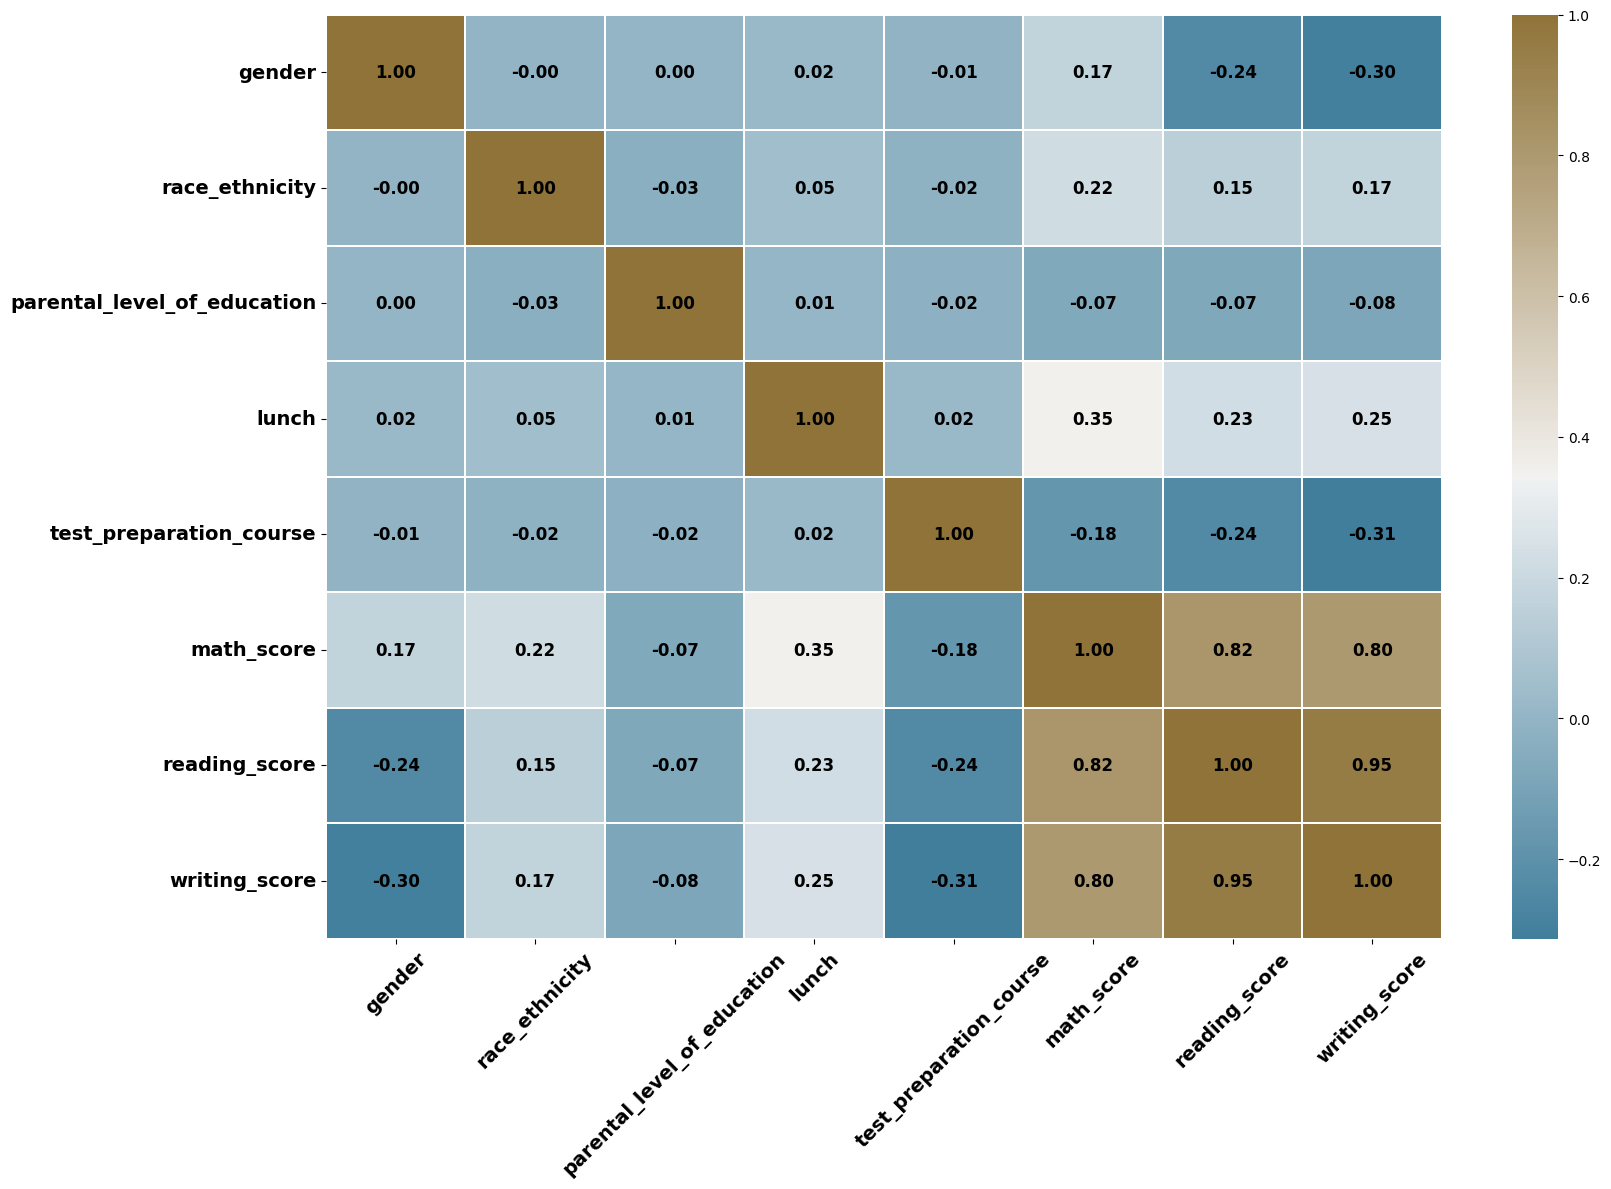

In [ ]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df2 = df.copy()

# Iterate over columns in DataFrame
for i in df2.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(18, 12), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(230, 60, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=45)
plt.yticks(fontsize=14, weight='bold')
plt.show()

#Univariate Analysis--------------------------------------------------------------------------------------------------

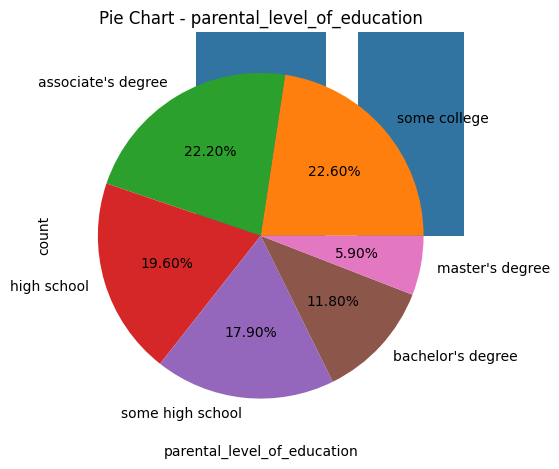

In [ ]:
variable = 'parental_level_of_education'

plt.figure(figsize = (10,10))
#count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat,order = df_cat['parental_level_of_education'].value_counts().index)
plt.title(f'Count Plot -{variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1, 2, 1)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#adjust layout
plt.tight_layout()

#Show the plots
plt.show()

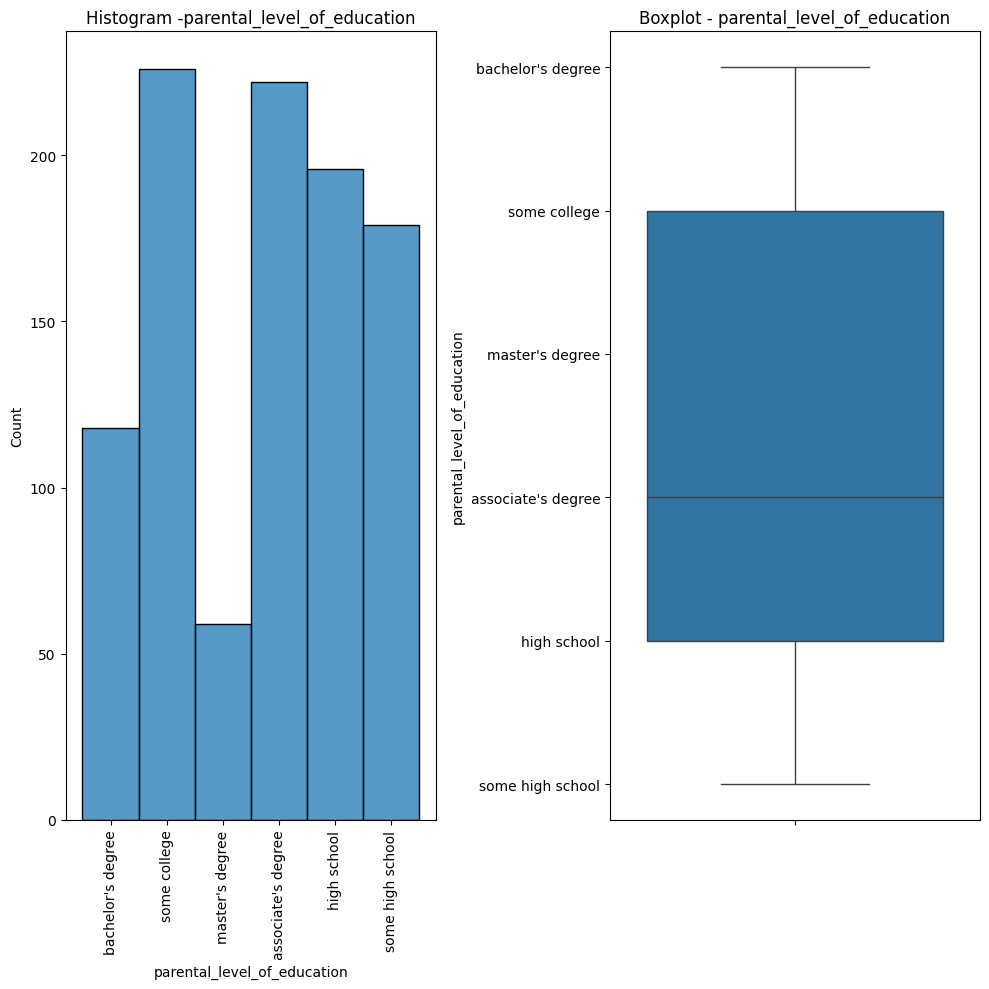

In [ ]:
variable = 'parental_level_of_education'

plt.figure(figsize = (10,10))
#Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram -{variable}')
plt.xticks(rotation = 90)

#Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data=df)
plt.title(f'Boxplot - {variable}')

#adjust layout
plt.tight_layout()

#Show the plots
plt.show()

In [ ]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

#Bivariate Analysis--------------------------------------------------------------------------------------------------

In [ ]:
ct_conversion_test_group = pd.crosstab(df['gender'], df['test_preparation_course'],normalize ='index')
ct_conversion_test_group

test_preparation_course,completed,none
gender,,
female,0.355212,0.644788
male,0.360996,0.639004


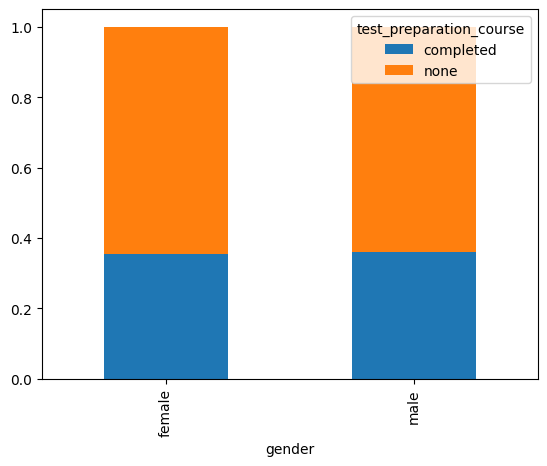

In [ ]:
ct_conversion_test_group.plot.bar(stacked = True);

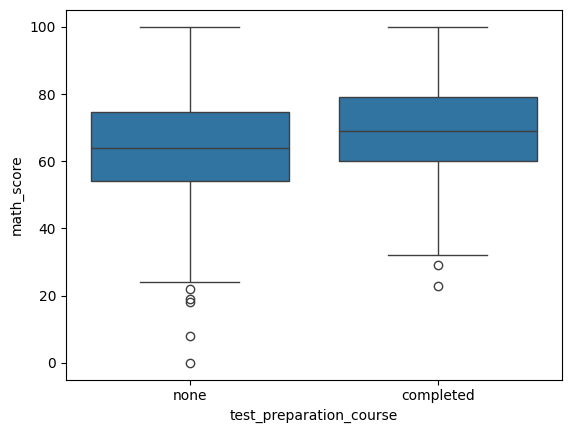

In [ ]:
sns.boxplot(x = 'test_preparation_course', y = 'math_score', data = df);

Statistical Test

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'test_preparation_course':
        #Create a contingency table
        contingency_table = pd.crosstab(df_cat[variable], df_cat['test_preparation_course'])

        #perform chi_squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        #Display the results
        print(f"\nChi-squared test for {variable} vs. test_preparation_course:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        #check for significance
        if p < alpha:
            print(f"the differences in test_preparation_course across {variable} is statiscally significant.")
        else:
            print(f"the is no significant differences in test_preparation_course across {variable}.")


Chi-squared test for gender vs. test_preparation_course:
Chi-squared value: 0.015529201882465888
p-value: 0.9008273880804724
the is no significant differences in test_preparation_course across gender.

Chi-squared test for race_ethnicity vs. test_preparation_course:
Chi-squared value: 5.4875148857070695
p-value: 0.24082911295018397
the is no significant differences in test_preparation_course across race_ethnicity.

Chi-squared test for parental_level_of_education vs. test_preparation_course:
Chi-squared value: 9.54407054307069
p-value: 0.08923388625809343
the is no significant differences in test_preparation_course across parental_level_of_education.

Chi-squared test for lunch vs. test_preparation_course:
Chi-squared value: 0.22095439044844808
p-value: 0.6383136809999865
the is no significant differences in test_preparation_course across lunch.


In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#step 1: check assumptions
#normality assumptions
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['test_preparation_course'] == 'completed']['math_score'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['test_preparation_course'] == 'none']['math_score'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

#equality of variances
levene_stat_true, levene_p_value_true = levene(df[df['lunch'] == 'completed']['math_score'])
levene_stat_false, levene_p_value_false = levene(df[df['lunch'] == 'none']['math_score'])
#levene_stat = levene(df[df['test_preparation_course']]['math_score'])
#evene_p_value = levene(df[~df['test_preparation_course']]['math_score'])
#print(f"Levene's test for equality of variances : p-value = {levene_p_value}")
print(f"Levene's test for equality of variances (True group): p-value = {levene_p_value_true}")
print(f"Levene's test for equality of variances (False group): p-value = {levene_p_value_false}")

Shapiro-Wilk test for normality (True group): p-value = 0.1393494159012535
Shapiro-Wilk test for normality (False group): p-value = 0.0017542243871878584


ValueError: Must enter at least two input sample vectors.

In [ ]:
#Step 2 perform a suitable test
alpha = 0.05

if shapiro_p_value_true > alpha  and shapiro_p_value_false > alpha and levene_p_value > alpha:
    #assumptions met - use t test for means
    t_stat, t_p_value = ttest_ind(df[df['test_preparation_course']]['math_score'],df[~df['test_preparation_course']]['math_score'])
    print(f"Independent 2-sample t-test: p-value = {t_p_value}")
else:
    #assumptions not met - use Mann-whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['test_preparation_course']]['math_score'],df[~df['test_preparation_course']]['math_score'])
    print(f"Mann Whitney U test: p-value = {u_p_value}")

KeyError: "None of [Index(['none', 'completed', 'none', 'none', 'none', 'none', 'completed',\n       'none', 'completed', 'none',\n       ...\n       'completed', 'completed', 'none', 'none', 'none', 'completed', 'none',\n       'completed', 'completed', 'none'],\n      dtype='object', length=1000)] are in the [columns]"

#Data Deep Exploration--------------------------------------------------------------------------------------------------

In [ ]:
#Function for bar charts

def bar_charts(x, y, title):
    """
    Generate a bar chart using Plotly Express.

    Parameters:
    - x: Data for the x-axis (e.g., categories).
    - y: Data for the y-axis (e.g., corresponding values).
    - title: Title of the chart.

    Returns:
    - None
"""
    # Create a bar chart using Plotly Express
fig = px.bar(df,
        x= 'gender',  # Data for the x-axis
        y= 'parental_level_of_education',  # Data for the y-axis
        title='title',  # Title of the chart
        color='gender',  # Color the bars based on y-values
        labels={'x': 'Profession', 'y': 'Average Income'},  # Custom axis labels
        text='math_score',  # Add text labels to the bars
        orientation='h',
    )

#fig.show()
    # Customize the layout
fig.update_layout(
        paper_bgcolor='#111',  # Set the background color of the entire plot
        plot_bgcolor='#111',   # Set the background color of the plot area
        font_color='white',     # Set the font color
        font=dict(size=20)     # Set the font size
    )

fig.show()

    # Display the figure

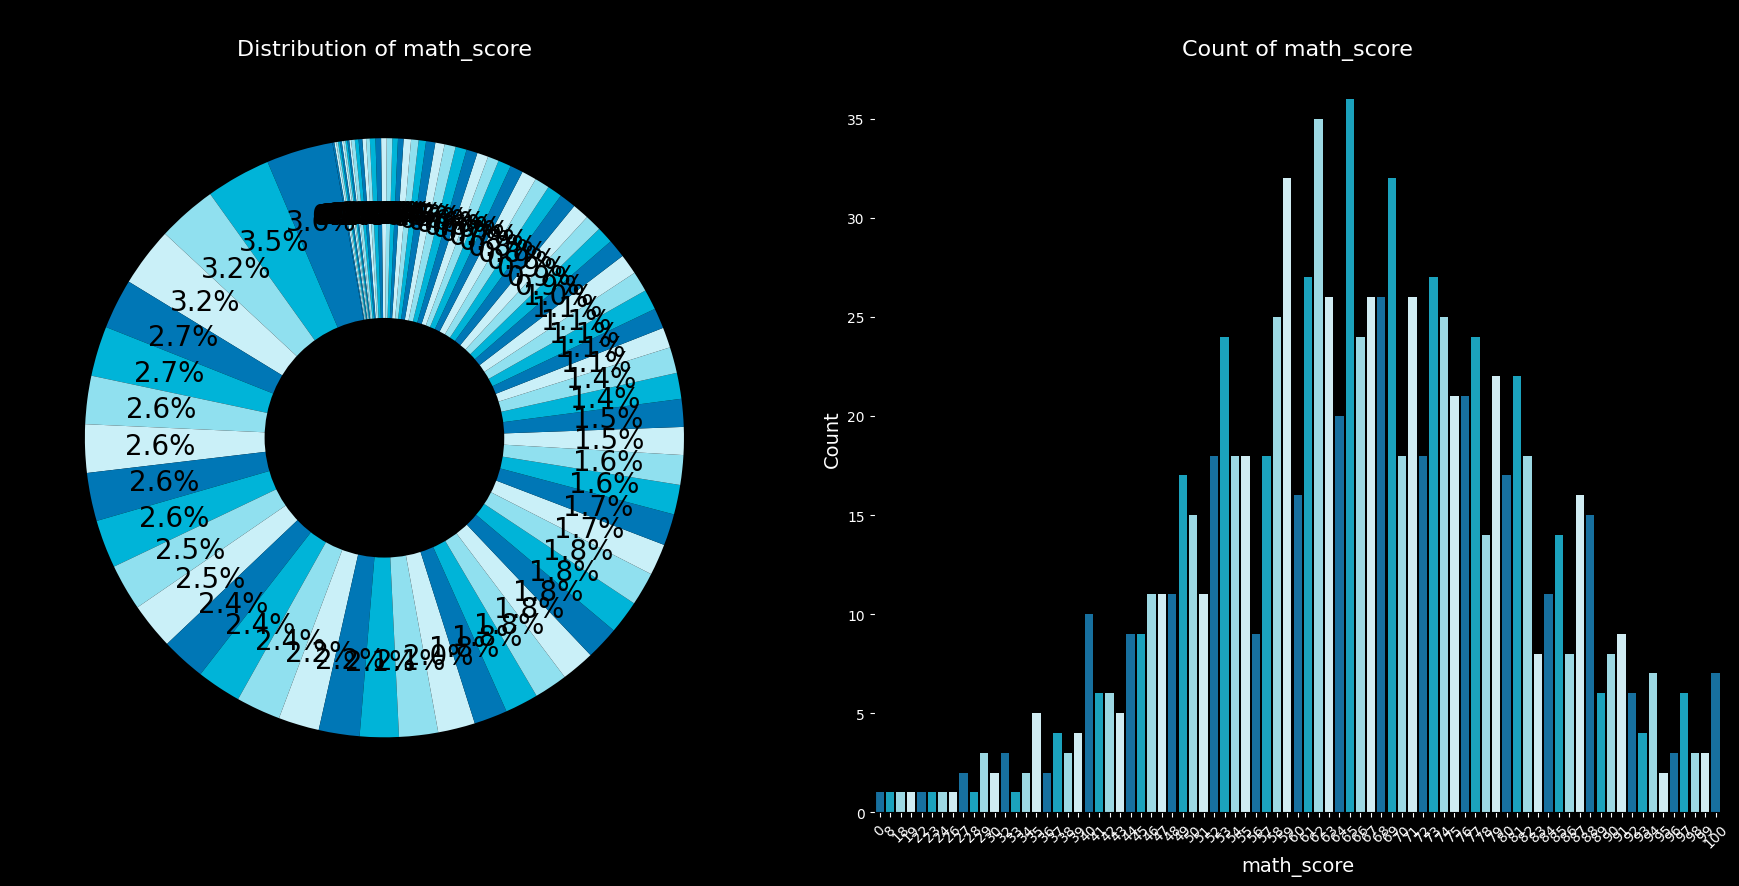

In [ ]:
#Function for Pie charts & Bar charts
def single_plot_distribution(column_name, dataframe, title):
    """
    Generate a pie chart and a bar chart to visualize the distribution of values in a single column.

    Parameters:
    - column_name: Name of the column to visualize.
    - dataframe: DataFrame containing the data.
    - title: Title of the plots.

    Returns:
    - None
"""
# Get the value counts of the specified column
value_counts = df['math_score'].value_counts()

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), facecolor='black') 

# Set main title for the figure
fig.suptitle('title')

# Pie chart
pie_colors = ['#0077b6', '#00b4d8', '#90e0ef', '#caf0f8']
ax1.pie(value_counts, autopct='%0.001f%%', startangle=100, textprops={'fontsize': 20}, pctdistance=0.75, colors=pie_colors, labels=None)
centre_circle = plt.Circle((0,0),0.40,fc='black')
ax1.add_artist(centre_circle)
ax1.set_title(f"Distribution of {'math_score'}", fontsize=16, color='white')

# Bar chart
sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=pie_colors) 
ax2.set_title(f"Count of {'math_score'}", fontsize=16, color='white')
ax2.set_xlabel('math_score', fontsize=14, color='white')
ax2.set_ylabel('Count', fontsize=14, color='white')

# Rotate x-axis labels for better readability
ax2.tick_params(axis='x', rotation=45, colors='white')
ax2.tick_params(axis='y', colors='white')

# Set background color for the subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
#Function for Sunburst
#def sun_brust(data, path, color_map, title):
"""
    Generate a sunburst chart using Plotly Express.

    Parameters:
    - data: DataFrame or array-like object containing the data.
    - path: List-like object specifying the hierarchical structure of the sunburst chart.
    - color_map: Dictionary mapping values to colors for coloring the segments.
    - title: Title of the chart.

    Returns:
    - None
    """
    # Create a sunburst chart using Plotly Express
fig = px.sunburst(
        df,  # Data for the chart
        path=['gender','parental_level_of_education'],  # Specifies the hierarchical structure
        color='gender',  # Color the segments based on the first element of the path
        color_discrete_map={"male": "RebeccaPurple", "female": "MediumPurple"}  # Map values to colors
    )

    # Customize the layout
fig.update_layout(
        title='title',  # Set the title of the chart
        paper_bgcolor='#111',  # Set the background color of the entire plot
        plot_bgcolor='#111',   # Set the background color of the plot area
        font_color='white',     # Set the font color
        font=dict(
            family='Comic Sans MS',  # Set the font family
            size=20,  # Set the font size
            color='white'  # Set the font color
        ),
        width=1000,  # Set the width of the plot
        height=600   # Set the height of the plot
    )

    # Update traces for markers and text
fig.update_traces(
        marker=dict(line=dict(color='white', width=2)),  # Set the marker color and width
        textfont=dict(size=15)  # Set the text font size
    )

    # Display the chart
fig.show()

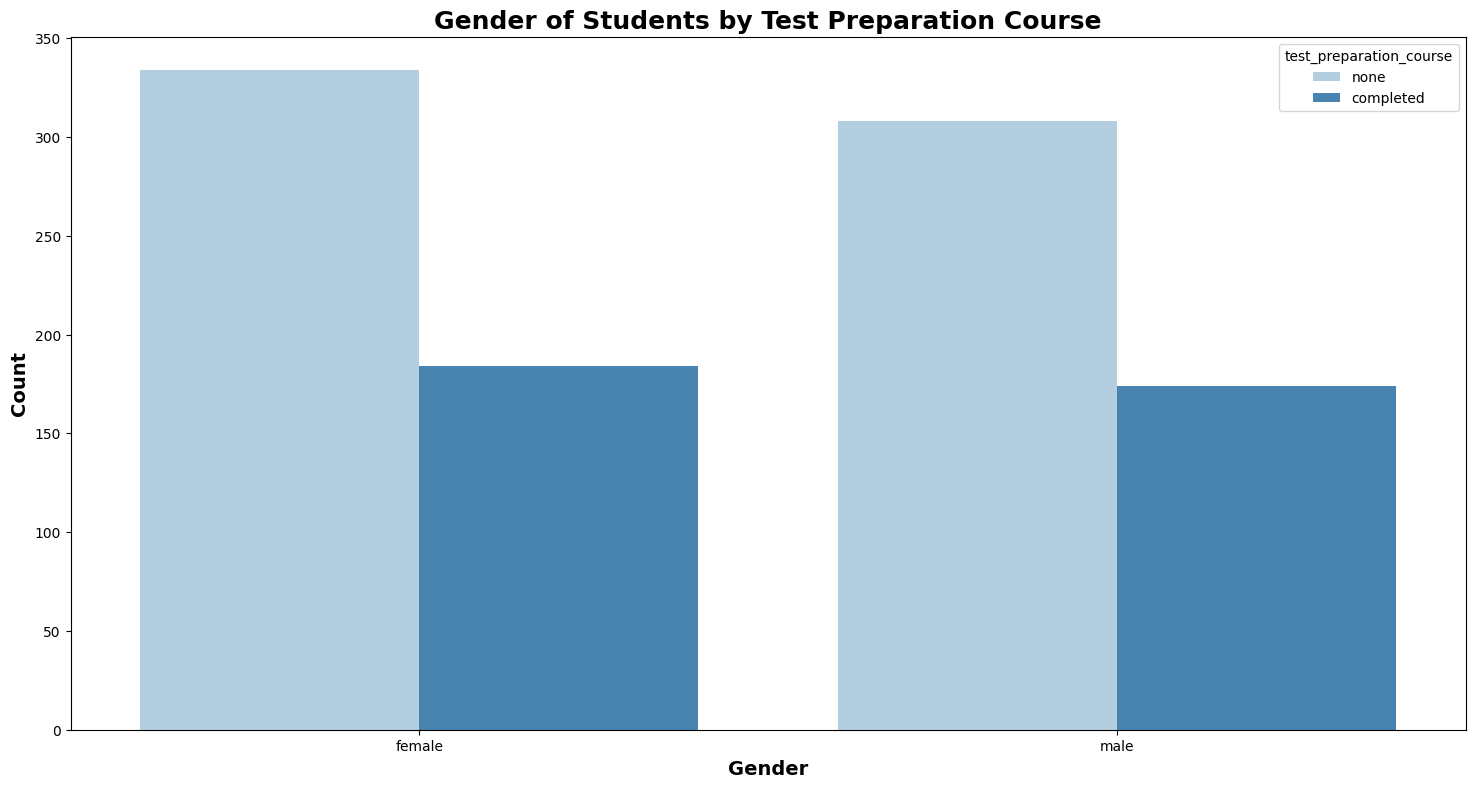

In [ ]:
#Gender of Students by Test Preparation Course
# Group the DataFrame by 'gender' and 'test_preparation_course', and count the occurrences
gn = df.groupby('gender')['test_preparation_course'].value_counts()

# Set up the figure for plotting
plt.figure(figsize=(18, 9))

# Create a count plot with seaborn, grouping by 'gender' and coloring by 'test_preparation_course'
sns.countplot(x='gender', hue='test_preparation_course', data=df, palette='Blues')

# Set the title of the plot
plt.title('Gender of Students by Test Preparation Course', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})

# Set labels for x-axis and y-axis
plt.xlabel('Gender', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

In [ ]:
# Plot the distribution of lunch in the dataset
single_plot_distribution('lunch', df, 'Lunch Distribution')

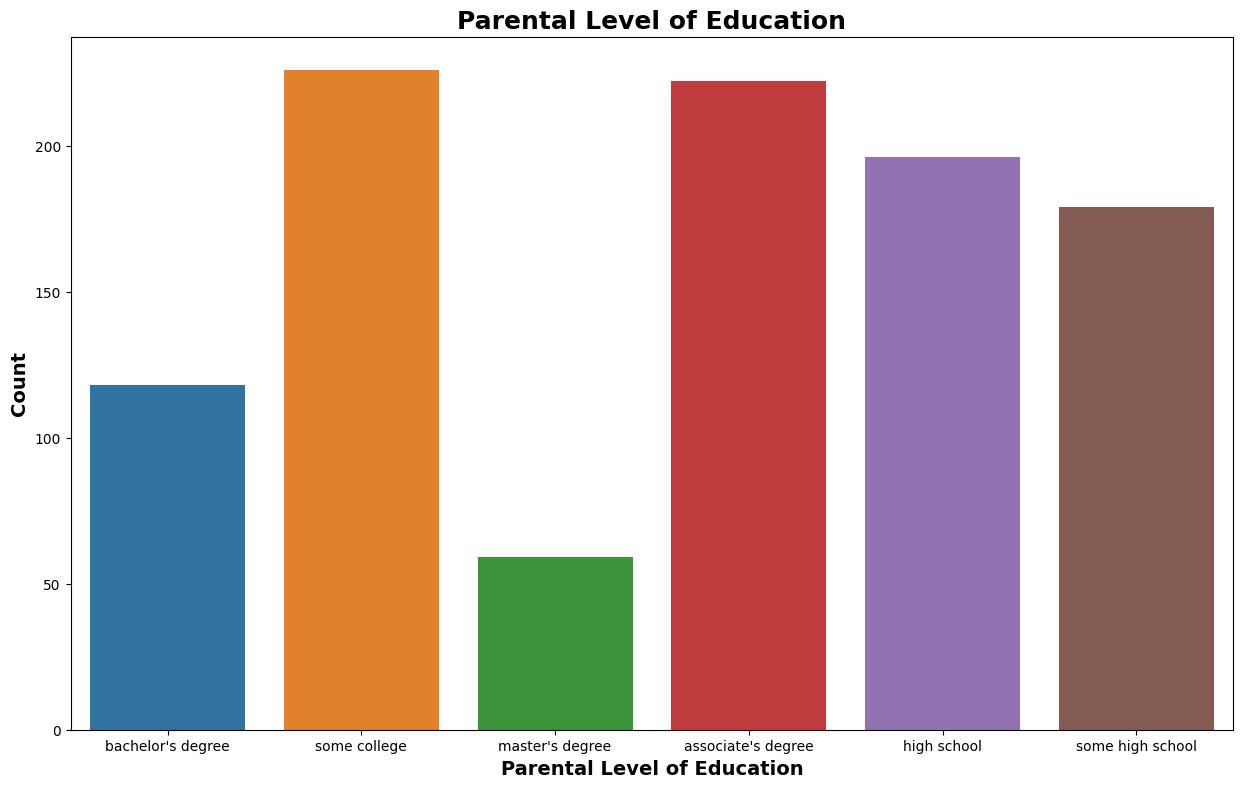

In [ ]:
# Set up the figure for plotting
plt.figure(figsize=(15, 9))

# Create a count plot with seaborn, specifying the DataFrame (df), x-axis (parental_level_of_education), and hue (parental_level_of_education)
sns.countplot(data=df, x='parental_level_of_education', hue='parental_level_of_education')

# Set the title of the plot
plt.title('Parental Level of Education', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})

# Set labels for x-axis and y-axis
plt.xlabel('Parental Level of Education', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

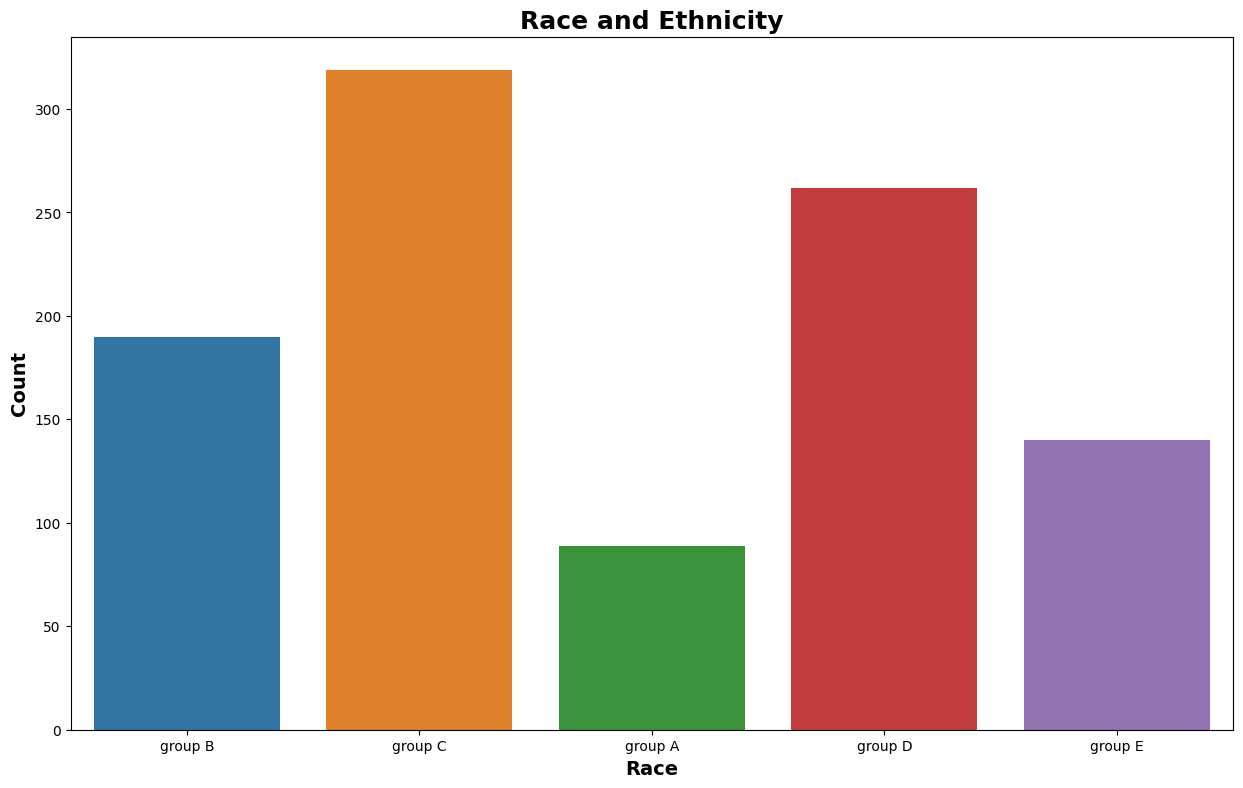

In [ ]:
# Set up the figure for plotting
plt.figure(figsize=(15, 9))

# Create a count plot with seaborn, specifying the DataFrame (df), x-axis (race_ethnicity), and hue (race_ethnicity)
sns.countplot(data=df, x='race_ethnicity', hue='race_ethnicity')

# Set the title of the plot
plt.title('Race and Ethnicity', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})

# Set labels for x-axis and y-axis
plt.xlabel('Race', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

In [ ]:
# Group the DataFrame by 'gender' and calculate the mean of 'writing_score'
nm = df.groupby('gender')['writing_score'].mean().round(2)

# Call the bar_charts function to generate a bar chart
bar_charts(
    nm.index,           # Data for the x-axis (gender)
    nm.values,          # Data for the y-axis (average writing score)
    'Average Writing Score by Gender'  # Title of the chart
)

In [ ]:
# Group the DataFrame by 'gender' and calculate the mean of 'math_score'
np = round(df.groupby('gender')['math_score'].mean().round(1))

# Call the bar_charts function to generate a bar chart
bar_charts(
    np.index,           # Data for the x-axis (gender)
    np.values,          # Data for the y-axis (average math score)
    'Average Maths Score by Gender'  # Title of the chart
)

In [ ]:
# Group the DataFrame by 'gender' and calculate the mean of 'reading_score'
np = df.groupby('gender')['reading_score'].mean().round(2)

# Call the bar_charts function to generate a bar chart
bar_charts(
    np.index,           # Data for the x-axis (gender)
    np.values,          # Data for the y-axis (average reading score)
    'Average Reading Score by Gender'  # Title of the chart (corrected)
)


In [ ]:
# Plot the distribution of parental level of education
single_plot_distribution('parental_level_of_education', df, 'Lunch Distribution')

Machine Learning

In [ ]:
X= df.drop('test_preparation_course', axis=1)
y = df['test_preparation_course']
# Define column transformer for feature encoding
column_trans = ColumnTransformer([
    ('one', OneHotEncoder(), ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch'])
], remainder='passthrough')

# Split data into training and testing sets

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
}

# Encode target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



# List to store accuracy scores of different models
accuracies = []

# Iterate over models and evaluate
for model_name, model in models.items():
    print(f"Evaluating {model_name}:")
    
    # Define pipeline for each model
    pipe = Pipeline([
        ('column_trans', column_trans),
        ('model', model)
    ])
    
    # Train model
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}\n")

Evaluating Logistic Regression:
Accuracy: 0.71

Evaluating Random Forest:
Accuracy: 0.63

Evaluating Support Vector Machine:
Accuracy: 0.605

Evaluating XGBoost:
Accuracy: 0.68



In [ ]:
# Create a DataFrame to store model names and their corresponding accuracies
acc_df = pd.DataFrame({'Model': models.keys(), 'Accuracy': accuracies})

# Call the bar_charts function to generate a bar chart
bar_charts(
    acc_df['Model'],     # Data for the x-axis (model names)
    acc_df['Accuracy'],  # Data for the y-axis (model accuracies)
    'Model Accuracy'     # Title of the chart
)

Neural Network

In [ ]:
# Define column transformer for feature encoding
column_trans = ColumnTransformer([
    ('one', OneHotEncoder(), ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch'])
], remainder='passthrough')

X_train_Scaled = column_trans.fit_transform(X_train)
X_test_Scaled = column_trans.transform(X_test)

In [ ]:
# Define the architecture of the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_Scaled.shape[1],)),  # Input layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),   # Hidden layer with 32 neurons and ReLU activation
    tf.keras.layers.Dense(16, activation='relu'),   # Hidden layer with 16 neurons and ReLU activation
    tf.keras.layers.Dense(8, activation='relu'),    # Hidden layer with 8 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron (for binary classification) and Sigmoid activation
])

# Compile the model
model.compile(optimizer='Adam',  # Use Adam optimizer
              loss='binary_crossentropy',  # Use binary crossentropy loss function (suitable for binary classification)
              metrics=['accuracy'])  # Use accuracy as the evaluation metric

# Define early stopping to prevent overfitting
# early_stopping = EarlyStopping(patience=50, monitor='val_loss')  # Stop training if validation loss doesn't improve for 5 epochs

# Train the model
history = model.fit(X_train_Scaled,           # Training data
                    y_train,                  # Target data
                    epochs=100,               # Number of epochs for training
                    validation_data=(X_test_Scaled, y_test),  # Validation data
                #     callbacks=[early_stopping],             # Use early stopping
                    batch_size=32,            # Batch size for training
                    verbose=1)                # Show training progress

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6189 - loss: 0.7317 - val_accuracy: 0.6050 - val_loss: 0.6768
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6636 - loss: 0.6636 - val_accuracy: 0.6050 - val_loss: 0.6670
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5693 - loss: 0.6850 - val_accuracy: 0.6150 - val_loss: 0.6544
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6519 - loss: 0.6509 - val_accuracy: 0.6050 - val_loss: 0.6792
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6551 - loss: 0.6374 - val_accuracy: 0.6100 - val_loss: 0.6453
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6804 - loss: 0.6205 - val_accuracy: 0.6600 - val_loss: 0.6475
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6501 - loss: 0.6422 - val_accuracy: 0.6150 - val_loss: 0.6582
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6886 - loss: 0.6120 - val_accuracy: 0.6500 - 